In [2]:
# Environment Set-Up
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Data Collection
# This is the latest New York Times county-level COVID-19 database.
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
939983,2021-01-17,Sweetwater,Wyoming,56037.0,3290,26.0
939984,2021-01-17,Teton,Wyoming,56039.0,2685,4.0
939985,2021-01-17,Uinta,Wyoming,56041.0,1817,9.0
939986,2021-01-17,Washakie,Wyoming,56043.0,842,23.0


After setting up the environment and importing the desirable data, I proceeded to check if there are any null values in the dataset. I ask questions like, what are the null values and are the null values important to our goal. Raising questions can guide me through obstacles.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939988 entries, 0 to 939987
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    939988 non-null  object 
 1   county  939988 non-null  object 
 2   state   939988 non-null  object 
 3   fips    931216 non-null  float64
 4   cases   939988 non-null  int64  
 5   deaths  919901 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 43.0+ MB
None


In [5]:
df.isnull().sum()

date          0
county        0
state         0
fips       8772
cases         0
deaths    20087
dtype: int64

We have null values in 'fips' and 'deaths'. FIPS codes (Federal Information Processing Standards/American National Standards Institute) are a standard geographic identifier. Analysts may use this code to combine with other data sets like a map file or population data. However, since this mini project does not require additional data, this can be removed.

In [6]:
del df['fips']
df

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
939983,2021-01-17,Sweetwater,Wyoming,3290,26.0
939984,2021-01-17,Teton,Wyoming,2685,4.0
939985,2021-01-17,Uinta,Wyoming,1817,9.0
939986,2021-01-17,Washakie,Wyoming,842,23.0


In [7]:
# Now let's dig deeper. Why there are null values in deaths?

death_null = pd.isnull(df["deaths"])
df[death_null]

,date,county,state,cases,deaths
117486,2020-05-05,Adjuntas,Puerto Rico,3,NaN
117487,2020-05-05,Aguada,Puerto Rico,7,NaN
117488,2020-05-05,Aguadilla,Puerto Rico,11,NaN
117489,2020-05-05,Aguas Buenas,Puerto Rico,22,NaN
117490,2020-05-05,Aibonito,Puerto Rico,13,NaN
...,...,...,...,...,...
939145,2021-01-17,Vega Baja,Puerto Rico,2460,NaN
939146,2021-01-17,Vieques,Puerto Rico,193,NaN
939147,2021-01-17,Villalba,Puerto Rico,657,NaN
939148,2021-01-17,Yabucoa,Puerto Rico,899,NaN


It seems much of the null values in 'deaths' are coming from Puerto Rico. Based on the premise of this mini project, the removal of this specific data will not affect the outcome.

In [8]:
deletePR = df[df['state'] == 'Puerto Rico'].index
df.drop(deletePR , inplace=True)
df

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
939983,2021-01-17,Sweetwater,Wyoming,3290,26.0
939984,2021-01-17,Teton,Wyoming,2685,4.0
939985,2021-01-17,Uinta,Wyoming,1817,9.0
939986,2021-01-17,Washakie,Wyoming,842,23.0


In [9]:
# For now, all null values have been managed.
df.isnull().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

This following part is used to understand the daily counts of new cases and new deaths, especially in New York City and in the recent 30 days.

In [10]:
NYCdf  = df[(df['state'] == 'New York') & (df['county'] == 'New York City')]
NYCdf

,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0.0
448,2020-03-02,New York City,New York,1,0.0
482,2020-03-03,New York City,New York,2,0.0
518,2020-03-04,New York City,New York,2,0.0
565,2020-03-05,New York City,New York,4,0.0
...,...,...,...,...,...
925636,2021-01-13,New York City,New York,504826,25741.0
928881,2021-01-14,New York City,New York,510711,25834.0
932126,2021-01-15,New York City,New York,517963,25909.0
935371,2021-01-16,New York City,New York,524231,25970.0


In [11]:
NYCdailycases = NYCdf['cases'] - NYCdf['cases'].shift(1)
NYCdf.insert(5, 'daily_cases', NYCdailycases)
NYCdf

,date,county,state,cases,deaths,daily_cases
416,2020-03-01,New York City,New York,1,0.0,NaN
448,2020-03-02,New York City,New York,1,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0
518,2020-03-04,New York City,New York,2,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,2.0
...,...,...,...,...,...,...
925636,2021-01-13,New York City,New York,504826,25741.0,5949.0
928881,2021-01-14,New York City,New York,510711,25834.0,5885.0
932126,2021-01-15,New York City,New York,517963,25909.0,7252.0
935371,2021-01-16,New York City,New York,524231,25970.0,6268.0


In [12]:
NYCdailycases = NYCdf['deaths'] - NYCdf['deaths'].shift(1)
NYCdf.insert(6, 'daily_deaths', NYCdailycases)
NYCdf

,date,county,state,cases,deaths,daily_cases,daily_deaths
416,2020-03-01,New York City,New York,1,0.0,NaN,NaN
448,2020-03-02,New York City,New York,1,0.0,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0,0.0
518,2020-03-04,New York City,New York,2,0.0,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,2.0,0.0
...,...,...,...,...,...,...,...
925636,2021-01-13,New York City,New York,504826,25741.0,5949.0,43.0
928881,2021-01-14,New York City,New York,510711,25834.0,5885.0,93.0
932126,2021-01-15,New York City,New York,517963,25909.0,7252.0,75.0
935371,2021-01-16,New York City,New York,524231,25970.0,6268.0,61.0


In [13]:
NYCdf = NYCdf.fillna(value=0)
NYCdf

,date,county,state,cases,deaths,daily_cases,daily_deaths
416,2020-03-01,New York City,New York,1,0.0,0.0,0.0
448,2020-03-02,New York City,New York,1,0.0,0.0,0.0
482,2020-03-03,New York City,New York,2,0.0,1.0,0.0
518,2020-03-04,New York City,New York,2,0.0,0.0,0.0
565,2020-03-05,New York City,New York,4,0.0,2.0,0.0
...,...,...,...,...,...,...,...
925636,2021-01-13,New York City,New York,504826,25741.0,5949.0,43.0
928881,2021-01-14,New York City,New York,510711,25834.0,5885.0,93.0
932126,2021-01-15,New York City,New York,517963,25909.0,7252.0,75.0
935371,2021-01-16,New York City,New York,524231,25970.0,6268.0,61.0


In [14]:
NYCdf.insert(7, 'day', range(1, 1 + len(NYCdf)))
NYCdf

,date,county,state,cases,deaths,daily_cases,daily_deaths,day
416,2020-03-01,New York City,New York,1,0.0,0.0,0.0,1
448,2020-03-02,New York City,New York,1,0.0,0.0,0.0,2
482,2020-03-03,New York City,New York,2,0.0,1.0,0.0,3
518,2020-03-04,New York City,New York,2,0.0,0.0,0.0,4
565,2020-03-05,New York City,New York,4,0.0,2.0,0.0,5
...,...,...,...,...,...,...,...,...
925636,2021-01-13,New York City,New York,504826,25741.0,5949.0,43.0,319
928881,2021-01-14,New York City,New York,510711,25834.0,5885.0,93.0,320
932126,2021-01-15,New York City,New York,517963,25909.0,7252.0,75.0,321
935371,2021-01-16,New York City,New York,524231,25970.0,6268.0,61.0,322


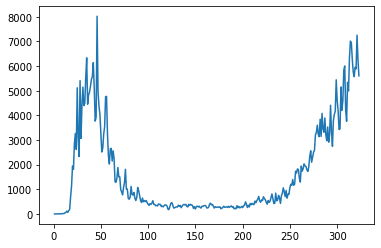

In [29]:
plt.plot(NYCdf['day'],NYCdf['daily_cases'])

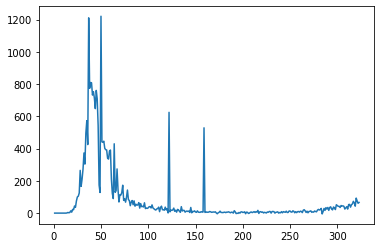

In [16]:
plt.plot(NYCdf['day'],NYCdf['daily_deaths'])

In [17]:
lastupdate = NYCdf['day'].max()
pre30days = lastupdate - 30
NYCdf30 = NYCdf.iloc[pre30days: lastupdate]
NYCdf30

,date,county,state,cases,deaths,daily_cases,daily_deaths,day
844505,2020-12-19,New York City,New York,381067,24677.0,3339.0,25.0,294
847750,2020-12-20,New York City,New York,383808,24697.0,2741.0,20.0,295
850995,2020-12-21,New York City,New York,387595,24735.0,3787.0,38.0,296
854240,2020-12-22,New York City,New York,391634,24768.0,4039.0,33.0,297
857485,2020-12-23,New York City,New York,395810,24790.0,4176.0,22.0,298
860730,2020-12-24,New York City,New York,401251,24842.0,5441.0,52.0,299
863975,2020-12-25,New York City,New York,405857,24889.0,4606.0,47.0,300
867220,2020-12-26,New York City,New York,410048,24931.0,4191.0,42.0,301
870465,2020-12-27,New York City,New York,413472,24973.0,3424.0,42.0,302
873710,2020-12-28,New York City,New York,416922,25008.0,3450.0,35.0,303


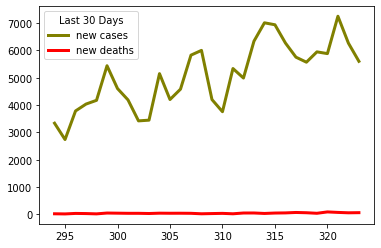

In [18]:
# Here is a closer look at the recent 30 days.

plt.plot(NYCdf30['day'],NYCdf30['daily_cases'], marker='', color='olive', linewidth=3, label="new cases")
plt.plot(NYCdf30['day'],NYCdf30['daily_deaths'], marker='', color='red', linewidth=3, label="new deaths")
plt.legend(title='Last 30 Days')

Conclusion (Part I)

From the visualizations, we can see NYC is currently in its second wave. It should be indicated that there are spikes in daily deaths, approximately Day 125 and 162, that needs further investigation. Also, compared to its first wave, NYC is experiencing less deaths.

The next part is comparing the daily count of new cases and new deaths from states New York and California.

In [19]:
NYdf  = df[(df['state'] == 'New York')]
NYdf

,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0.0
448,2020-03-02,New York City,New York,1,0.0
482,2020-03-03,New York City,New York,2,0.0
518,2020-03-04,New York City,New York,2,0.0
519,2020-03-04,Westchester,New York,9,0.0
...,...,...,...,...,...
938641,2021-01-17,Washington,New York,1438,23.0
938642,2021-01-17,Wayne,New York,3606,50.0
938643,2021-01-17,Westchester,New York,83707,1789.0
938644,2021-01-17,Wyoming,New York,2114,41.0


In [20]:
CAdf  = df[(df['state'] == 'California')]
CAdf

,date,county,state,cases,deaths
5,2020-01-25,Orange,California,1,0.0
9,2020-01-26,Los Angeles,California,1,0.0
10,2020-01-26,Orange,California,1,0.0
14,2020-01-27,Los Angeles,California,1,0.0
15,2020-01-27,Orange,California,1,0.0
...,...,...,...,...,...
936982,2021-01-17,Tulare,California,40655,501.0
936983,2021-01-17,Tuolumne,California,3304,38.0
936984,2021-01-17,Ventura,California,60368,412.0
936985,2021-01-17,Yolo,California,10406,131.0


In [21]:
NYdf = NYdf.groupby(pd.to_datetime(df.date).dt.date).agg({'cases': 'sum'}).reset_index()
CAdf = CAdf.groupby(pd.to_datetime(df.date).dt.date).agg({'cases': 'sum'}).reset_index() 

In [22]:
NYdailycases = NYdf['cases'] - NYdf['cases'].shift(1)
NYdf.insert(2, 'daily_cases', NYdailycases)
NYdf = NYdf.fillna(value=0)
NYdf

,date,cases,daily_cases
0,2020-03-01,1,0.0
1,2020-03-02,1,0.0
2,2020-03-03,2,1.0
3,2020-03-04,11,9.0
4,2020-03-05,22,11.0
...,...,...,...
318,2021-01-13,1179523,14704.0
319,2021-01-14,1193710,14187.0
320,2021-01-15,1213179,19469.0
321,2021-01-16,1229124,15945.0


In [23]:
CAdailycases = CAdf['cases'] - CAdf['cases'].shift(1)
CAdf.insert(2, 'daily_cases', CAdailycases)
CAdf = CAdf.fillna(value=0)
CAdf

,date,cases,daily_cases
0,2020-01-25,1,0.0
1,2020-01-26,2,1.0
2,2020-01-27,2,0.0
3,2020-01-28,2,0.0
4,2020-01-29,2,0.0
...,...,...,...
354,2021-01-13,2857587,41654.0
355,2021-01-14,2898271,40684.0
356,2021-01-15,2937376,39105.0
357,2021-01-16,2974966,37590.0


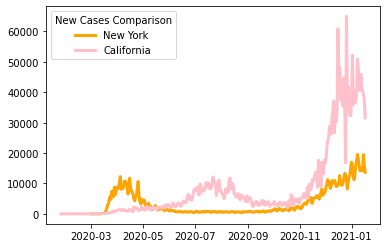

In [30]:
plt.plot(NYdf['date'],NYdf['daily_cases'], marker='', color='orange', linewidth=3, label="New York")
plt.plot(CAdf['date'],CAdf['daily_cases'], marker='', color='pink', linewidth=3, label="California")
plt.legend(title='New Cases Comparison')

In [25]:
NYdf2  = df[(df['state'] == 'New York')]
NYdf2 = NYdf2.groupby(pd.to_datetime(df.date).dt.date).agg({'deaths': 'sum'}).reset_index()
NYdailydeaths = NYdf2['deaths'] - NYdf2['deaths'].shift(1)
NYdf2.insert(2, 'daily_deaths', NYdailydeaths)
NYdf2 = NYdf2.fillna(value=0)
NYdf2

,date,deaths,daily_deaths
0,2020-03-01,0.0,0.0
1,2020-03-02,0.0,0.0
2,2020-03-03,0.0,0.0
3,2020-03-04,0.0,0.0
4,2020-03-05,0.0,0.0
...,...,...,...
318,2021-01-13,39760.0,172.0
319,2021-01-14,39997.0,237.0
320,2021-01-15,40203.0,206.0
321,2021-01-16,40376.0,173.0


In [26]:
CAdf2  = df[(df['state'] == 'California')]
CAdf2 = CAdf2.groupby(pd.to_datetime(df.date).dt.date).agg({'deaths': 'sum'}).reset_index()
CAdailydeaths = CAdf2['deaths'] - CAdf2['deaths'].shift(1)
CAdf2.insert(2, 'daily_deaths', CAdailydeaths)
CAdf2 = CAdf2.fillna(value=0)
CAdf2

,date,deaths,daily_deaths
0,2020-01-25,0.0,0.0
1,2020-01-26,0.0,0.0
2,2020-01-27,0.0,0.0
3,2020-01-28,0.0,0.0
4,2020-01-29,0.0,0.0
...,...,...,...
354,2021-01-13,31653.0,548.0
355,2021-01-14,32246.0,593.0
356,2021-01-15,32947.0,701.0
357,2021-01-16,33393.0,446.0


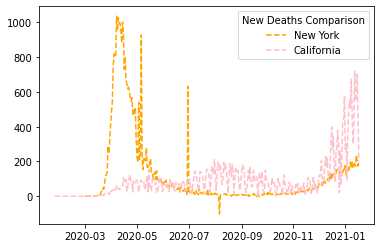

In [32]:
plt.plot(NYdf2['date'],NYdf2['daily_deaths'], marker='', color='orange', linestyle='dashed', linewidth=1.5, label="New York")
plt.plot(CAdf2['date'],CAdf2['daily_deaths'], marker='', color='pink', linestyle='dashed', linewidth=1.5, label="California")
plt.legend(title='New Deaths Comparison')

Conclusion (Part II)
- New York received their first case later than California, but California experienced their first wave of cases later than New York.
- California's first wave lasted longer.
- When both states were in their first wave, their daily count of new cases at its highest were very similar.
- However, New York had more deaths for its first wave, despite both states having a similar peak in daily cases in their respective first wave.
- Currently, both states are now in its second wave, but California has more cases daily.